In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UniAcco/bank.csv', sep=';', index_col= None)
df_test = pd.read_csv('/content/drive/MyDrive/UniAcco/test.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.drop(['contact', 'day'], axis=1, inplace = True)
#drop these columns as type of contact and day of contact won't affect the subscription of the term deposit

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.nunique()

#Thus, default, housing, loan, y are the binary columns

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

#Handling unnecessary values

In [ ]:
df[df['campaign']<0].value_counts()


Series([], dtype: int64)

In [ ]:
df[df['previous']<0].value_counts()

Series([], dtype: int64)

In [ ]:
df[df['pdays'] < 0].value_counts()

#since pdays can not be negative, thus we have to treat that abnormal value

age  job          marital   education  default  balance  housing  loan  month  duration  campaign  pdays  previous  poutcome  y  
19   student      single    primary    no        103     no       no    jul    104       2         -1     0         unknown   yes    1
45   services     divorced  primary    no        3854    yes      no    jun    10        3         -1     0         unknown   no     1
                            secondary  no        88      no       yes   jul    332       1         -1     0         unknown   no     1
                  married   secondary  no       -839     yes      no    may    68        1         -1     0         unknown   no     1
                                                 0       no       yes   jul    47        7         -1     0         unknown   no     1
                                                                                                                                    ..
35   blue-collar  married   primary    no       -12      yes

In [ ]:
df['pdays'] = df['pdays'].replace(-1, 0 )
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,oct,79,1,0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,jun,199,4,0,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,may,226,1,0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,jul,329,5,0,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,may,153,1,0,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,aug,151,11,0,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,feb,129,4,211,3,other,no


#Handling Categorical Values

In [ ]:
df.replace(['yes', 'no'], ['1','0'], inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,oct,79,1,0,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,jun,199,4,0,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,may,226,1,0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,jul,329,5,0,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,may,153,1,0,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,aug,151,11,0,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,feb,129,4,211,3,other,0


In [ ]:
df [['housing', 'default', 'loan', 'y']] = df [['housing', 'default', 'loan', 'y']].astype(int)
 #converting string to int for given columns to be treated as numeric values

df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [ ]:
df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [ ]:
df = df.drop(['poutcome'], axis=1)
#most of the data in this feature is missing and even after treating it will still cause uncertainity to the data. Thus, its better to drop the feature rather than introducing variability to the results.

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['marital', 'job', 'month', 'education'])
one_hot_encoded_data

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_primary,education_secondary,education_tertiary,education_unknown
0,30,0,1787,0,0,79,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,33,0,4789,1,1,220,1,339,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,35,0,1350,1,0,185,1,330,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,30,0,1476,1,1,199,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,59,0,0,1,0,226,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,329,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4517,57,1,-3313,1,1,153,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4518,57,0,295,0,0,151,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4519,28,0,1137,0,0,129,4,211,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_new = pd.merge(df, one_hot_encoded_data, how = 'outer')
df_new = df_new.drop(['job', 'marital', 'education','month'], axis=1)

#Handling Missing Values

In [ ]:
df_i = df_new.corr()
df_i['y']

age                    0.045092
default                0.001303
balance                0.017905
housing               -0.104683
loan                  -0.070517
duration               0.401118
campaign              -0.061147
pdays                  0.103810
previous               0.116714
y                      1.000000
marital_divorced       0.034840
marital_married       -0.064643
marital_single         0.045815
job_admin.             0.006568
job_blue-collar       -0.068147
job_entrepreneur      -0.015968
job_housemaid          0.004872
job_management         0.032634
job_retired            0.086675
job_self-employed     -0.003827
job_services          -0.024071
job_student            0.047809
job_technician        -0.010154
job_unemployed        -0.007312
job_unknown            0.019886
month_apr              0.062563
month_aug              0.012084
month_dec              0.069884
month_feb              0.039805
month_jan             -0.004109
month_jul             -0.038851
month_ju

In [ ]:
df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [ ]:
#dropping default and education_unkown columns in refernce to very low correlation with the independent variable
df_new = df_new.drop(['default', 'education_unknown'], axis=1)
df_new

,age,balance,housing,loan,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_primary,education_secondary,education_tertiary
0,30,1787,0,0,79,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,33,4789,1,1,220,1,339,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,35,1350,1,0,185,1,330,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,30,1476,1,1,199,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,59,0,1,0,226,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,1,0,329,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4517,57,-3313,1,1,153,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4518,57,295,0,0,151,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4519,28,1137,0,0,129,4,211,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#dropping the rows containing the unknown job status as the data is very very less and is very less likely to be impactful on final results

df_new = df_new.drop(['job_unknown'], axis=1)

#Scaling Dataset, Feature Selection and Handling imbalanced Dataset



In [ ]:
df_new

,age,balance,housing,loan,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_primary,education_secondary,education_tertiary
0,30,1787,0,0,79,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,33,4789,1,1,220,1,339,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,35,1350,1,0,185,1,330,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,30,1476,1,1,199,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,59,0,1,0,226,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,1,0,329,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4517,57,-3313,1,1,153,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4518,57,295,0,0,151,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4519,28,1137,0,0,129,4,211,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
Y = df_new['y'].copy()
X = df_new.drop(['y'], axis=1)

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(X)

Performing feature selection usign PCA

In [ ]:
from sklearn.decomposition import PCA



#pca = PCA(n_components = 4 )
#X= pca.fit_transform(X)


#explained_variance = pca.explained_variance_ratio_

In [ ]:
#explained_variance
# array([9.91506612e-01, 7.38977187e-03, 1.08986047e-03, 1.21667138e-05]
#thus it better to opt for only 3 components

In [ ]:
pca = PCA(n_components = 3 )
X= pca.fit_transform(X)

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.99150661 0.00738977 0.00108986]


In [ ]:
X.shape

(4521, 3)

Sampling

In [ ]:
Y.value_counts()

0    4000
1     521
Name: y, dtype: int64

In [ ]:
#Data is clearly undersampled. Thus, using SMOTE technique to balance the data.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = None)

, Y = sm.fit_resample(X, Y)

('Y', '=', 'sm.fit_resample(X,', 'Y)')

#Model Training

In [ ]:
from sklearn.model_selection import train_test_split

# split into 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
#Defining the performance criterion for a model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


def performance( model, Y_test, Y_pred):
  print("70 Train-30 Test Data Precision Score:",precision_score(Y_test, Y_pred))
  print("Cross Validation Mean Precision Score:", cross_val_score(model, X, Y, cv= kfold_validation, scoring = 'precision').mean(),"\n")
  print("70 Train-30 Test Data Recall Score:",recall_score(Y_test, Y_pred))
  print("Cross Validation Mean Recall Score:", cross_val_score(model, X, Y, cv= kfold_validation, scoring = 'recall').mean(), "\n")
  print("70 Train-30 Test Data Accuracy Score:", accuracy_score(Y_test, Y_pred))
  print("Cross Validation Mean Accuracy Score:", cross_val_score(model, X, Y, cv= kfold_validation, scoring = 'accuracy').mean(), "\n")
  print("70 Train-30 Test Data F1 Score:", f1_score(Y_test, Y_pred))
  print("Cross Validation Mean F1 Score:", cross_val_score(model, X, Y, cv= kfold_validation, scoring = 'f1').mean(), "\n")
  print("70 Train-30 Test Data AUC Score:", roc_auc_score(Y_test, Y_pred))
  print("Cross Validation Mean AUC Score:", cross_val_score(model, X, Y, cv= kfold_validation, scoring = 'roc_auc').mean(), "\n\n")
  print('\t')

  fpr, tpr, thr = roc_curve(Y_test, Y_pred)
  auc_model = auc(fpr, tpr)

  plt.figure(figsize=(5,5), dpi =100)
  plt.plot(fpr, tpr, label = "AUC" % auc_model)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()


In [ ]:
#importing for cross validation functions
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_validation = KFold(10)


#importing for hyperparamter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression

#parameters for logistic regression model
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

lr = LogisticRegression()
clf = GridSearchCV(lr, param_grid = param_grid)
lr_best = clf.fit(X,Y)

Y_lr_pred = lr_best.predict(X_test)


performance( lr_best, Y_test, Y_lr_pred)

70 Train-30 Test Data Precision Score: 0.3625
Cross Validation Mean Precision Score: 0.5704545454545454 

70 Train-30 Test Data Recall Score: 0.3473053892215569
Cross Validation Mean Recall Score: 0.1618350020083523 

70 Train-30 Test Data Accuracy Score: 0.8445099484156227
Cross Validation Mean Accuracy Score: 0.8894054386684639 

70 Train-30 Test Data F1 Score: 0.3547400611620795
Cross Validation Mean F1 Score: 0.2509275145347452 

70 Train-30 Test Data AUC Score: 0.6307955517536356
Cross Validation Mean AUC Score: 0.8251222617427233 


	


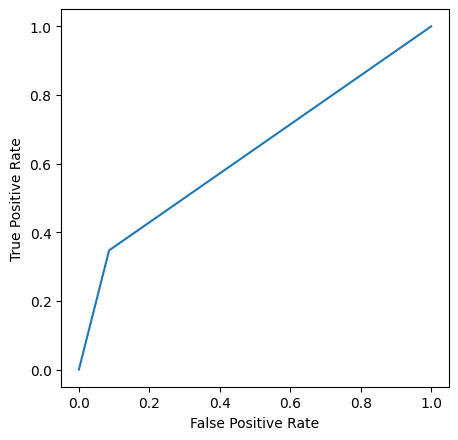

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_dt_pred = dt.predict(X_test)


performance( lr, Y_test, Y_dt_pred)

70 Train-30 Test Data Precision Score: 0.54
Cross Validation Mean Precision Score: 0.5704545454545454 

70 Train-30 Test Data Recall Score: 0.32335329341317365
Cross Validation Mean Recall Score: 0.1618350020083523 

70 Train-30 Test Data Accuracy Score: 0.8828297715549005
Cross Validation Mean Accuracy Score: 0.8894054386684639 

70 Train-30 Test Data F1 Score: 0.40449438202247195
Cross Validation Mean F1 Score: 0.2509275145347452 

70 Train-30 Test Data AUC Score: 0.64234891561415
Cross Validation Mean AUC Score: 0.8251222617427233 


	


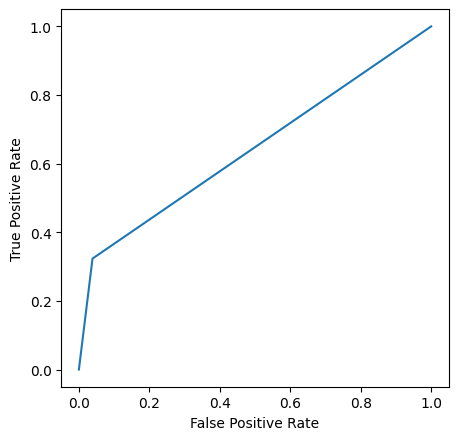

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_rf_pred = rf.predict(X_test)


performance( lr, Y_test, Y_rf_pred)

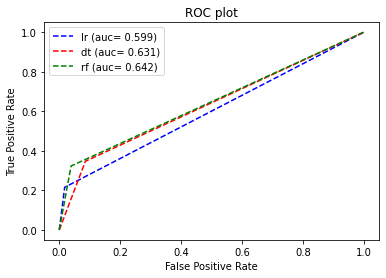

In [ ]:
#Plotting  ROC to predict the model performance and which one is better
fpr1, tpr1, thr1 = roc_curve(Y_test, Y_lr_pred)
auc_lr = auc(fpr1, tpr1)

fpr2, tpr2, thr2 = roc_curve(Y_test, Y_dt_pred)
auc_dt = auc(fpr2, tpr2)

fpr3, tpr3, thr3 = roc_curve(Y_test, Y_rf_pred)
auc_rf = auc(fpr3, tpr3)

plt.figure()
plt.plot(fpr1, tpr1, 'b--', label = 'lr (auc= %0.3f)' % auc_lr)
plt.plot(fpr2, tpr2, 'r--', label = 'dt (auc= %0.3f)' % auc_dt)
plt.plot(fpr3, tpr3, 'g--', label = 'rf (auc= %0.3f)' % auc_rf)

#title
plt.title('ROC plot')

# Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


#Show Legend and plot
plt.legend()
plt.show()
